# importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import convolve

# gerando os dados de exemplo, função senoide

In [2]:
x = np.linspace(0, 100, 100)
y = 10 * np.sin(x) * np.random.rand(x.shape[0])

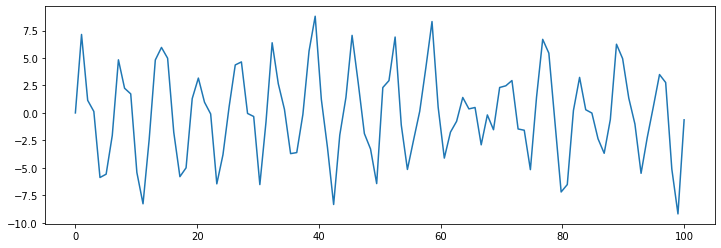

In [3]:
## plotando o grafico e visualisando os dados

plt.figure(figsize=(12, 4))
plt.plot(x, y)

### pra facilitar, a celula a seguir apresenta uma função que usa o matplotlib para imprimir os sinais 1D como imagens

In [4]:
def show(valores, title):
    plt.figure(figsize=(len(valores), 2))
    plt.imshow(valores[np.newaxis, :], cmap='gray')
    for k, s in enumerate(valores):
        plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
    plt.title(title, fontsize=18)
    plt.yticks([])        

### utilizaremos um pequeno trecho do sinal para ilustrar o efeito da convulução. Abaixo vamos plotar o sinal de duas formas diferentes para nos levar a um dominio mais proximo das imagens

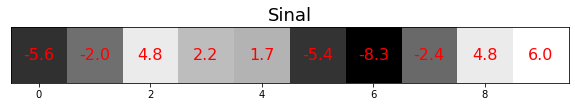

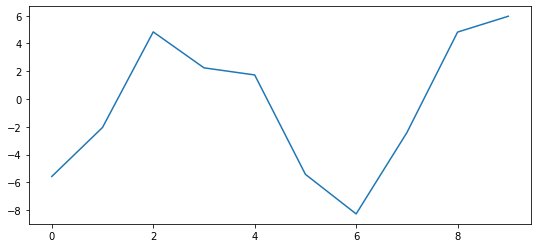

In [5]:
sinal = y[5: 15]
show(sinal, 'Sinal')

plt.figure(figsize=(9, 4))
plt.plot(sinal)

# criando o kernel = filtro covulacional

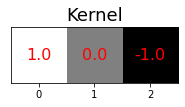

In [6]:
kernel = np.array([1, 0, -1])
show(kernel, 'Kernel')

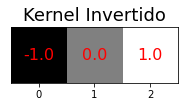

In [7]:
# Kernel Invertido

kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

## deslocando o kernel ao longo do sinal

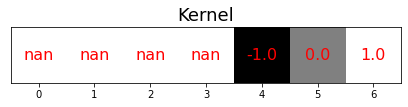

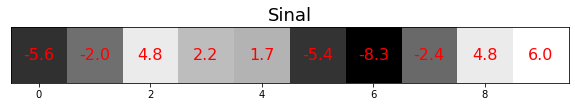

In [8]:
## vamos alterar o valor de u para controlar o deslocamento

u = 4
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel')
show(sinal, 'Sinal')

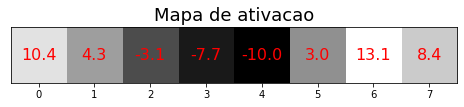

In [9]:
ativacao = convolve(sinal, kernel, mode='valid')
show(ativacao, 'Mapa de ativacao')

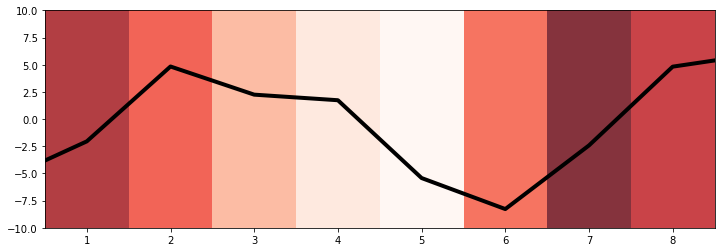

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(ativacao[np.newaxis, :], cmap='Reds', aspect='auto',
           alpha=0.8, extent=(0.5, 8.5, -10, 10))

## rodando para o 50's do sinal

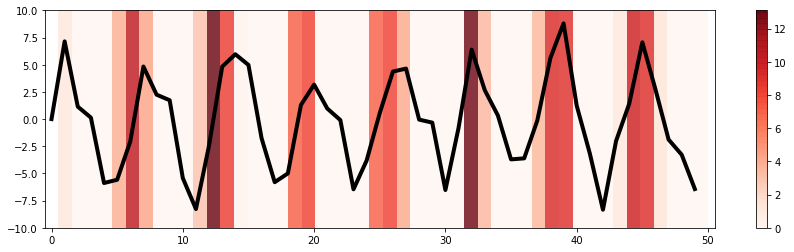

In [11]:
ativacao = convolve(y[:50], kernel, mode='valid')
ativacao[ativacao < 0] = 0

plt.figure(figsize=(15, 4))
plt.plot(y[:50], color='k', linewidth=4)
plt.imshow(ativacao[np.newaxis, :], cmap='Reds', aspect='auto',
           alpha=0.8, extent=(0.5, 50, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()